# World Happiness Report Data Cleaning and Analysis with Aggregation

In this project I will work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10. Data analysis will focus on answering questions such as:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?



In [28]:
import pandas as pd
import numpy as np
# read the World_Happiness_2015.csv file into a dataframe
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
print(happiness2015.info())
first_5 = happiness2015.iloc[:5,:]
print(first_5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB
None
       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2   

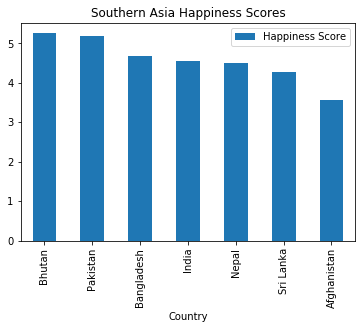

In [29]:
# Let's visualize happiness for a region and see how the data looks for south asia
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x='Country', y='Happiness Score', kind='bar', title='Southern Asia Happiness Scores', xlim=(0,10))

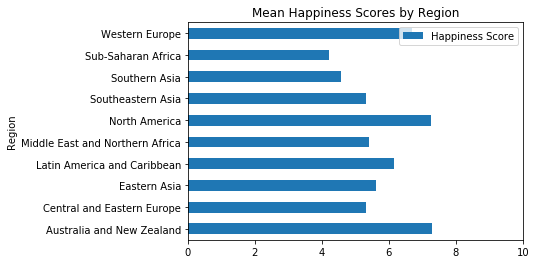

In [30]:
# reate a visualization that uses a summary statistic (mean value) to summarize the data for each region
agg_region_2015 = (happiness2015.groupby(["Region"]).mean()).reset_index()
agg_region_2015.plot(x='Region', y='Happiness Score', kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10))

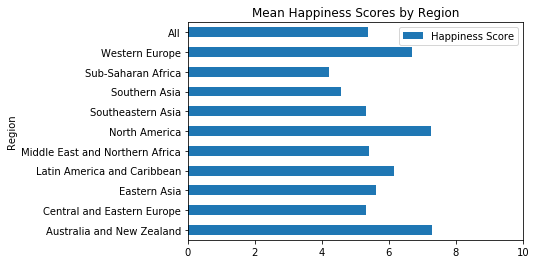

In [32]:
# we can use the df.pivot_table() method to more intuitively perform the same aggregation as above.
# As a user of MS Excel, this is also easier to comprehend
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

Note the difference above with the inclusion of the statistics for "All". This is very helpful during analysis and I prefer that.